<a href="https://colab.research.google.com/github/ibonetc/IA_Pregrado_-2025/blob/main/ML_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Principal Component Analysis

El análisis de componentes principales es un método de extracción de rasgos no supervisado, se puede usar para la reducción de la dimensionalidad de los datos y para extraer rasgos. Su comportamiento es más fácil de visualizar mirando un conjunto de datos bidimensional.

Esta técnica consiste en expresar un conjunto de variables en varias combinaciones lineales de factores no correlacionados entre sí


Considere los siguientes 200 puntos.

Ejemplo tomado de: https://jakevdp.github.io/PythonDataScienceHandbook/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

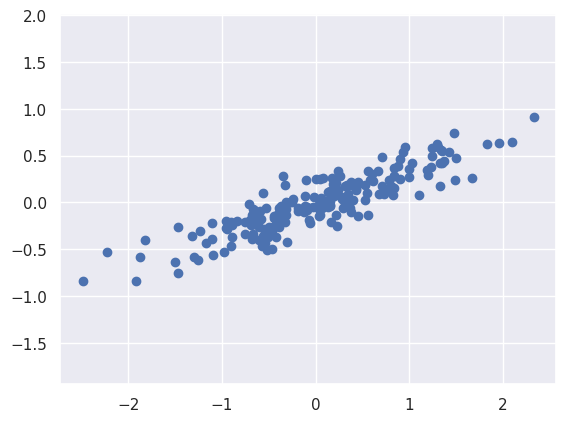

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

Aunque en este ejemplo está muy claro que hay una relación lineal y pudiera resolverse el problema de ajuste con una regresión lineal. Lo que queremos es aprender sobre la relación de los valores, no predecir la variable y.

El análisis de componentes principales, permite cuantificar la relación, encontrando una lista de los ejes principales en los datos y usnado esos ejes para describir el conjunto de datos.

Debemos especificar la cantidad de componentes principales que se van a sacar

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

Componentes y varianza explicada

In [4]:
print(pca.components_)

[[ 0.94446029  0.32862557]
 [-0.32862557  0.94446029]]


In [5]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


In [6]:
pca.mean_

array([ 0.03351168, -0.00408072])

Visualicmos estos números como vectores sobre los datos de entrada, usando los "componentes" para definir la dirección del vector y la "varianza explicada" para definir la longitud al cuadrado del vector.

Estos vectores representan los ejes principales de los datos, y la longitud del vector (varianza) es una indicación de cuán "importante" es ese eje para describir la distribución de los datos; más precisamente, es una medida de la varianza de los datos cuando se proyectan sobre ese eje. La proyección de cada punto de datos sobre los ejes principales son las "componentes principales" de los datos.

Grafiquemos estas componentes principales junto a los datos originales.

Primera componente:

In [7]:
first_comp=pca.components_[0]
first_variance=pca.explained_variance_[0]

component * 3 * sqrt(variance)

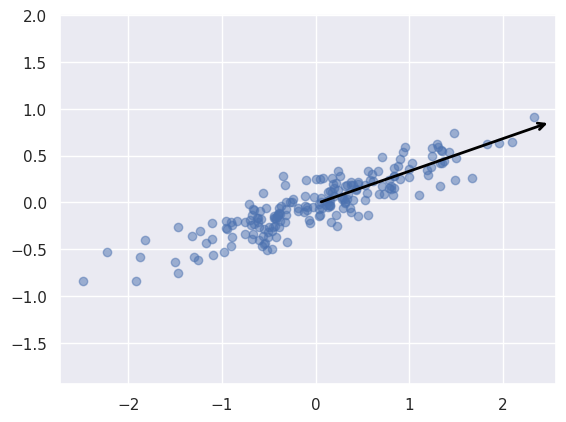

In [8]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
vector = first_comp * 3 * np.sqrt(first_variance)+ pca.mean_
ax = plt.gca()
arrowprops=dict(arrowstyle='->',
                color='black',
                linewidth=2,
                shrinkA=2, shrinkB=2)
ax.annotate('', vector, pca.mean_, arrowprops=arrowprops)
plt.axis('equal');

Segunda componente:

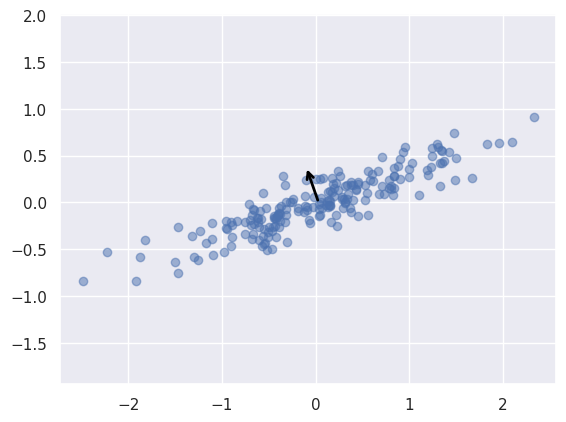

In [9]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
vector = pca.components_[1] * 3 * np.sqrt(pca.explained_variance_[1])+ pca.mean_
ax = plt.gca()
arrowprops=dict(arrowstyle='->',
                color='black',
                linewidth=2,
                shrinkA=2, shrinkB=2)
ax.annotate('', vector, pca.mean_, arrowprops=arrowprops)
plt.axis('equal');

Las dos componentes:

In [10]:
def draw_vector(v0, v1, ax=None):
  ax = ax or plt.gca()
  arrowprops=dict(arrowstyle='->',
                  color='black',
                  linewidth=2,
                  shrinkA=2, shrinkB=2)
  ax.annotate('', v1, v0, arrowprops=arrowprops)

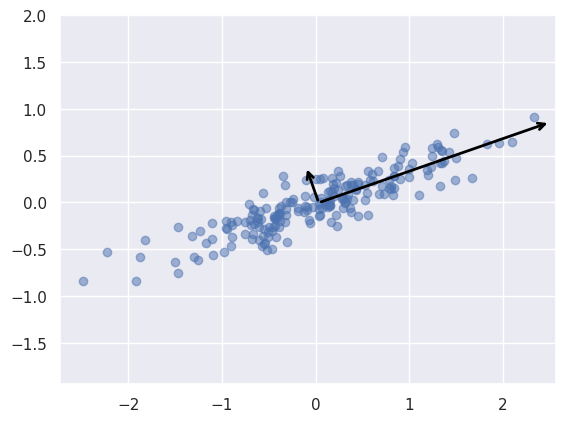

In [11]:
# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

## Ejemplo de usos de PCA
### Reducción de dimensionalidad para visualización

Usaremos la base de datos de dígitos escritos a mano. Esta base de datos consisten en imágenes pequeñas de 8×8 píxeles, lo que significa que tienen 64 dimensiones.Para ganar algo de intuición en las relaciones entre estos puntos, podemos usar PCA para proyectarlos a un número más manejable de dimensiones, por ejemplo dos dimensiones.

In [12]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Primeras 40 imágenes:

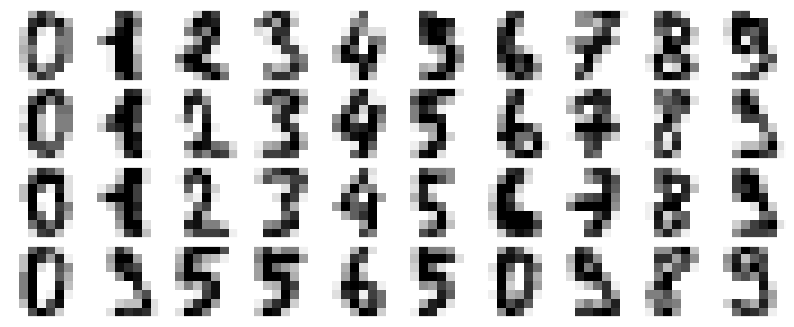

In [13]:
data=digits.data
fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                          subplot_kw={'xticks':[], 'yticks':[]},
                          gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
  ax.imshow(data[i].reshape(8, 8),
            cmap='binary', interpolation='nearest',
            clim=(0, 16))

### Seleccionando la cantidad de componentes:

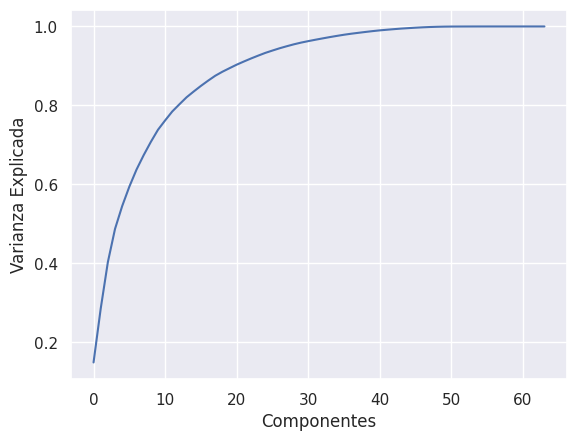

In [14]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Componentes')
plt.ylabel('Varianza Explicada');

Para poder explicar un 90% de la varianza y no perder tanta información necesitamos unas 20 componentes, esto significa redudir los datos de 64 entradas a 20. Para poder contener todo el 100% necesitamos unas 50 componentes.

Con sólo 2 componentes podemos graficar los datos, pero se pierde mucha información, en este caso:

In [15]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


/tmp/ipython-input-3601418601.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('Spectral', 10))


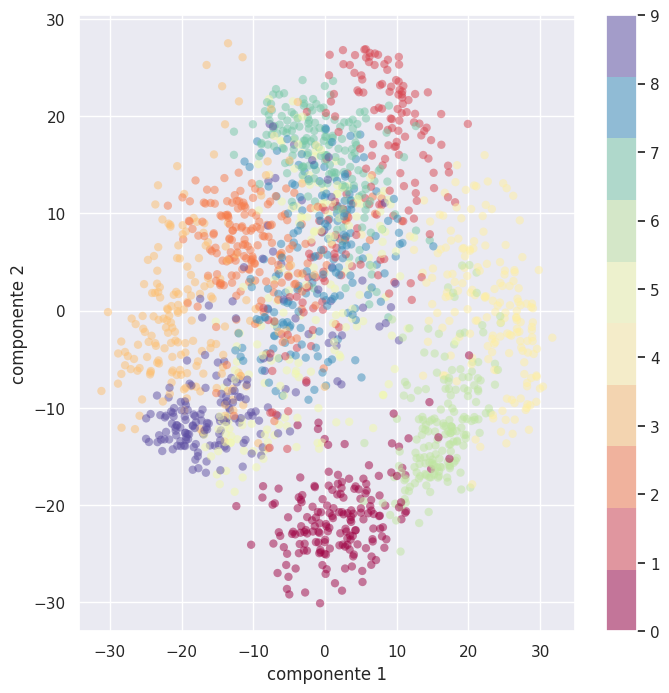

In [16]:
plt.figure(figsize=(8,8))
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.colorbar();

### Ejemplo Iris

#### Normalizar datos

In [17]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [18]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [19]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:,['target']].values

In [20]:
x = StandardScaler().fit_transform(x)

In [21]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])

In [22]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf

,PC1,PC2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


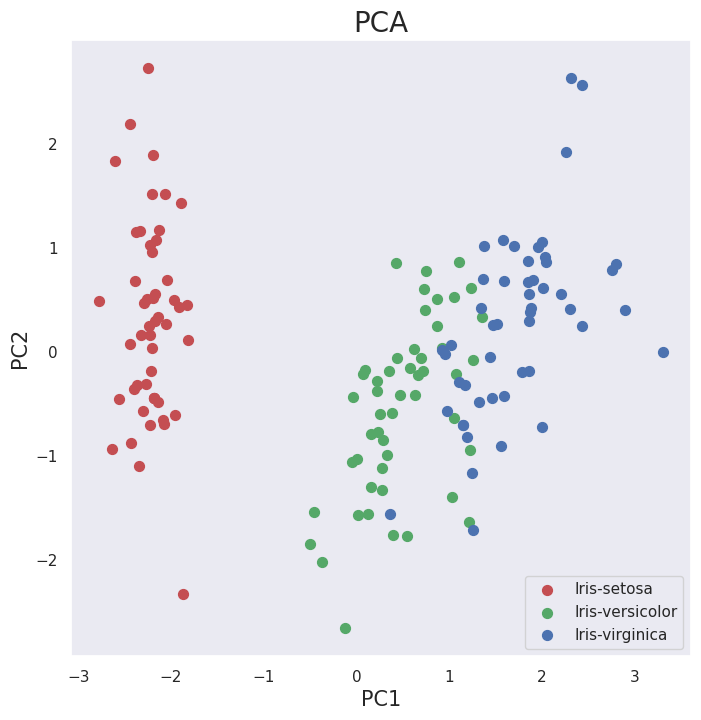

In [23]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Ejemplo base de datos vinos


In [24]:
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [25]:
X, y = load_wine(return_X_y=True)

In [26]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

#### Probando con Regresión Logística

In [28]:
clf_lr = LogisticRegression(random_state = 0)
clf_lr.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

Se debe hacer normalización de los datos

In [29]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
clf_lr = LogisticRegression(random_state = 0)
clf_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [31]:
y_pred = clf_lr.predict(X_test)

In [32]:
print(f"{accuracy_score(y_test, y_pred):.2%}")

98.15%


### Con PCA

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [34]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.34910949, 0.19264799])

In [35]:
clf_lr_pca = LogisticRegression(random_state = 0)
clf_lr_pca.fit(X_train_pca, y_train)

LogisticRegression(random_state=0)

In [36]:
y_pred = clf_lr_pca.predict(X_test_pca)
print(f"{accuracy_score(y_test, y_pred):.2%}")

96.30%


#### Con Naive Bayes

In [37]:
clf_nb= GaussianNB();
clf_nb.fit(X_train, y_train)
y_pred = clf_nb.predict(X_test)
print(f"{accuracy_score(y_test, y_pred):.2%}")

94.44%


In [38]:
clf_nb_pca = make_pipeline(PCA(n_components=2), GaussianNB())
clf_nb_pca.fit(X_train, y_train)
pred_test = clf_nb_pca.predict(X_test)

In [39]:
print(f"{accuracy_score(y_test, pred_test):.2%}\n")

94.44%



#### Importancia de normalizar para PCA

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)


std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

In [41]:
pca = unscaled_clf.named_steps["pca"]
pca_std = std_clf.named_steps["pca"]

In [42]:
X_train_transformed = pca.transform(X_train)

scaler = std_clf.named_steps["standardscaler"]
scaled_X_train = scaler.transform(X_train)
X_train_std_transformed = pca_std.transform(scaled_X_train)

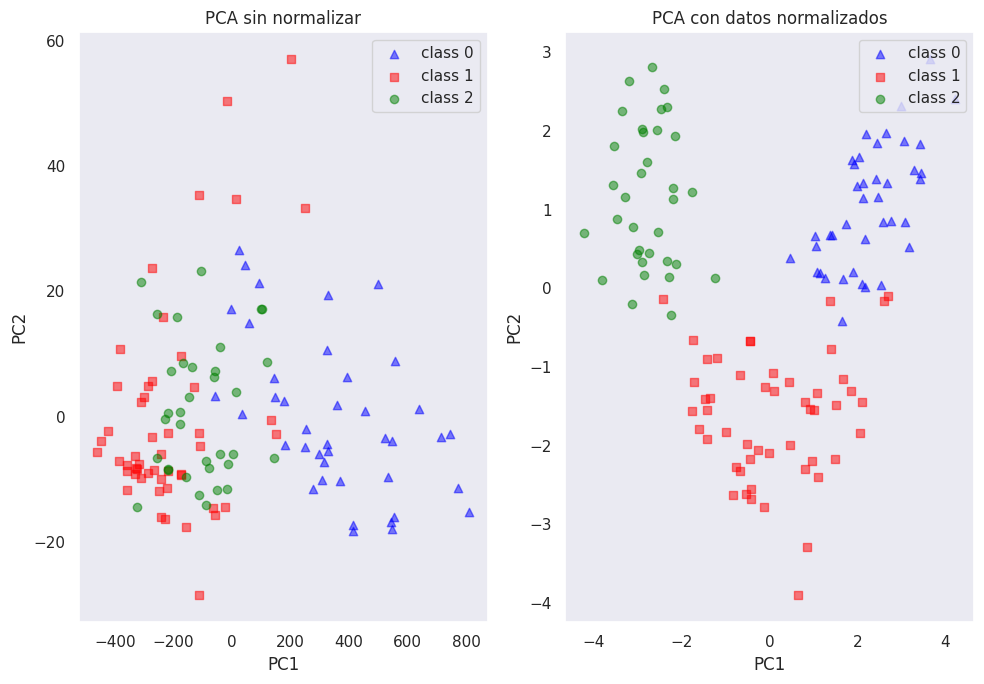

In [43]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,7)
)
target_classes = range(0, 3)
colors = ("blue", "red", "green")
markers = ("^", "s", "o")

for target_class, color, marker in zip(target_classes, colors, markers):
    ax1.scatter(
        x=X_train_transformed[y_train == target_class, 0],
        y=X_train_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

    ax2.scatter(
        x=X_train_std_transformed[y_train == target_class, 0],
        y=X_train_std_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

ax1.set_title("PCA sin normalizar")
ax2.set_title("PCA con datos normalizados")

for ax in (ax1, ax2):
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.legend(loc="upper right")
    ax.grid()

plt.tight_layout()

plt.show()

## Base de cáncer de mama

In [44]:
from sklearn.datasets import load_breast_cancer

In [45]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [46]:
scalar = StandardScaler()
scalar.fit(df)
scaled_data = scalar.transform(df)

In [47]:
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

Text(0, 0.5, 'PC2')

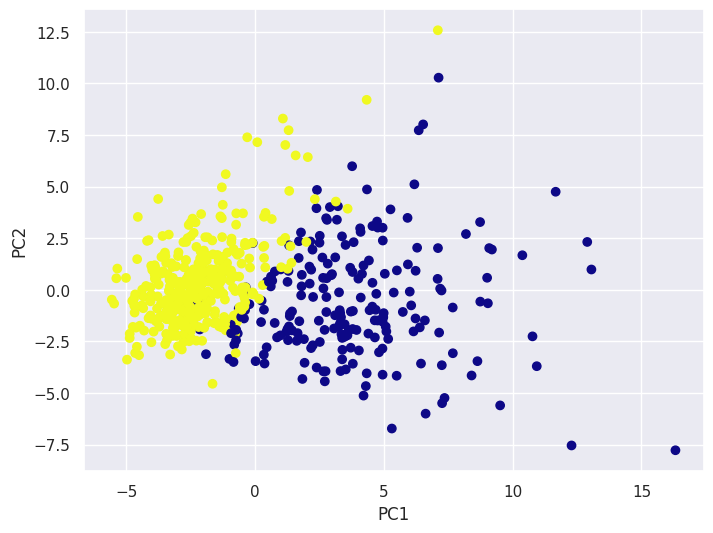

In [48]:
plt.figure(figsize =(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = cancer['target'], cmap ='plasma')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [49]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [50]:
df_comp = pd.DataFrame(pca.components_, columns = cancer['feature_names'])
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


<Axes: >

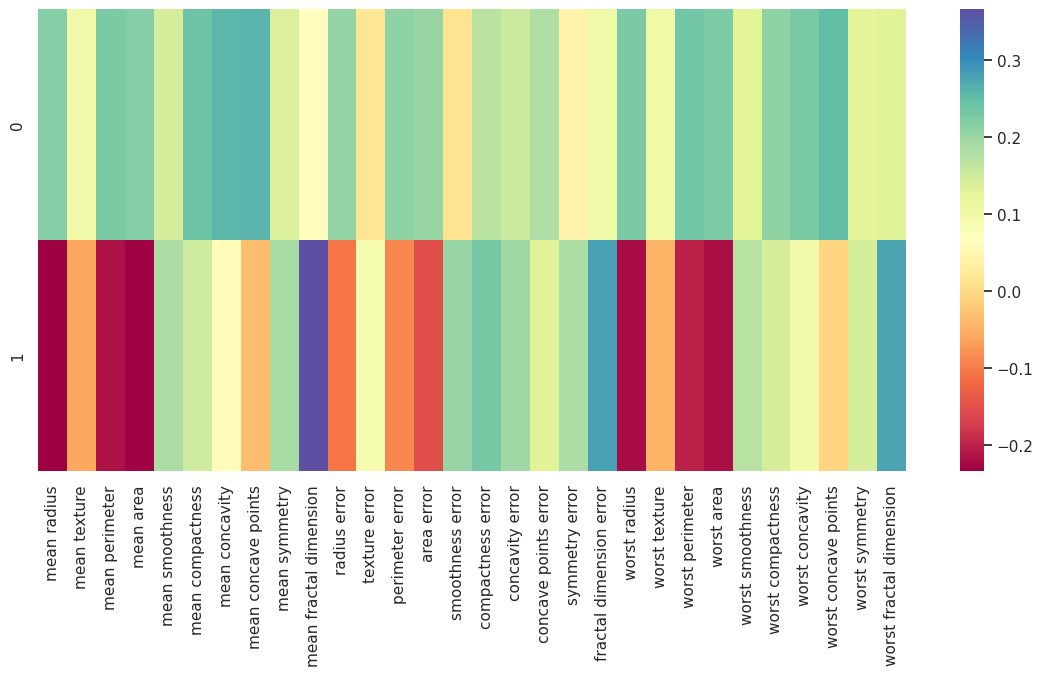

In [51]:
plt.figure(figsize =(14, 6))
sns.heatmap(df_comp, cmap='Spectral')

### Ejemplo de caras de personas

In [52]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Primeras 30 imágenes:

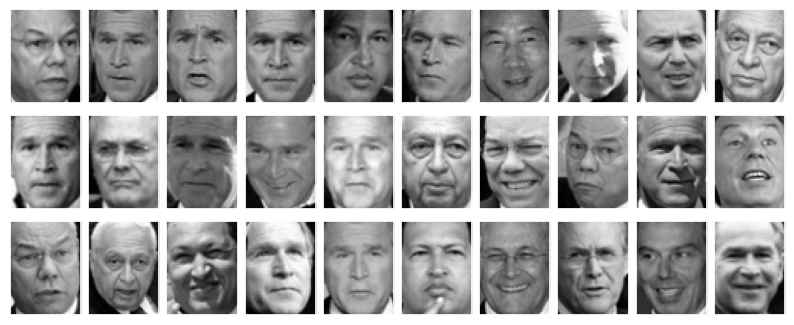

In [53]:
fig, axes = plt.subplots(3, 10, figsize=(10, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
  ax.imshow(faces.images[i], cmap='binary_r')

In [54]:
pca = PCA(200)
pca.fit(faces.data)

PCA(n_components=200)

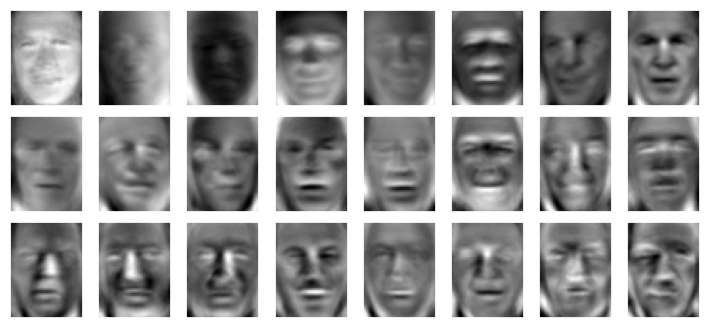

In [55]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
  ax.imshow(pca.components_[i].reshape(62, 47), cmap='binary_r')

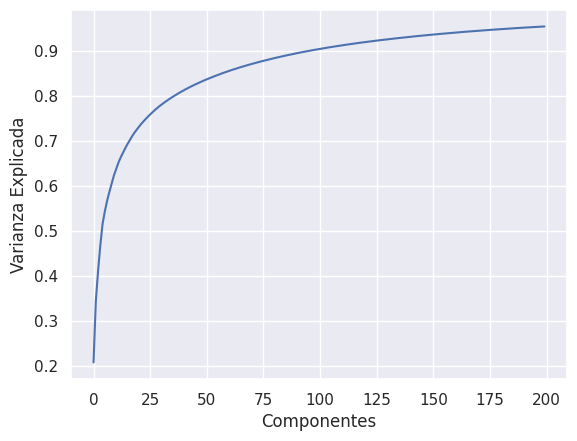

In [56]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Componentes')
plt.ylabel('Varianza Explicada');

In [57]:
pca = PCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

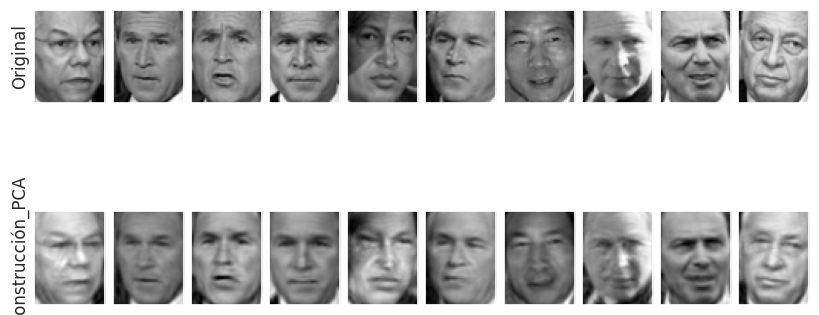

In [58]:
fig, ax = plt.subplots(2, 10, figsize=(10, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')

ax[0, 0].set_ylabel('Original')
ax[1, 0].set_ylabel('Reconstrucción_PCA');

In [59]:
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [60]:
pca=PCA(150,svd_solver='randomized', whiten=True)

In [61]:
svc = SVC(kernel='rbf')
model = make_pipeline(pca, svc)

In [62]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,random_state=42)

In [63]:
scaled=StandardScaler()
X_train_face=scaled.fit_transform(Xtrain)
X_test_face=scaled.transform(Xtest)

### Con PCA

In [64]:
param_grid = {'svc__C': [1, 5, 10],
              'svc__gamma': [0.0001, 0.001],
              'svc__kernel': ['rbf','linear']}
grid = GridSearchCV(model, param_grid)

%time grid.fit(X_train_face, ytrain)
print(grid.best_params_)

CPU times: user 1min 33s, sys: 172 ms, total: 1min 34s
Wall time: 57 s
{'svc__C': 10, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [65]:
grid.cv_results_

{'mean_fit_time': array([0.72001815, 1.07419472, 0.75861354, 0.75168071, 1.1453733 ,
        0.71713743, 0.66307173, 1.13270588, 0.81537509, 1.18274121,
        0.96367998, 0.68814764]),
 'std_fit_time': array([0.06810018, 0.42824197, 0.09629135, 0.1327392 , 0.57941431,
        0.07673346, 0.05359651, 0.66216767, 0.04638615, 0.39038557,
        0.3516429 , 0.07061759]),
 'mean_score_time': array([0.0711103 , 0.02832208, 0.0657774 , 0.01937413, 0.08950891,
        0.02062011, 0.06015387, 0.04244766, 0.06471548, 0.04499164,
        0.0676064 , 0.02087564]),
 'std_score_time': array([0.00182289, 0.00708031, 0.00566695, 0.00045437, 0.04494212,
        0.0015236 , 0.00195173, 0.02811289, 0.00813913, 0.0268987 ,
        0.00419964, 0.00171303]),
 'param_svc__C': masked_array(data=[1, 1, 1, 1, 5, 5, 5, 5, 10, 10, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value=999999),
 'param_svc__gamma':

In [66]:
grid.best_score_

np.float64(0.8200019509340096)

In [67]:
model = grid.best_estimator_
yfit = model.predict(X_test_face)

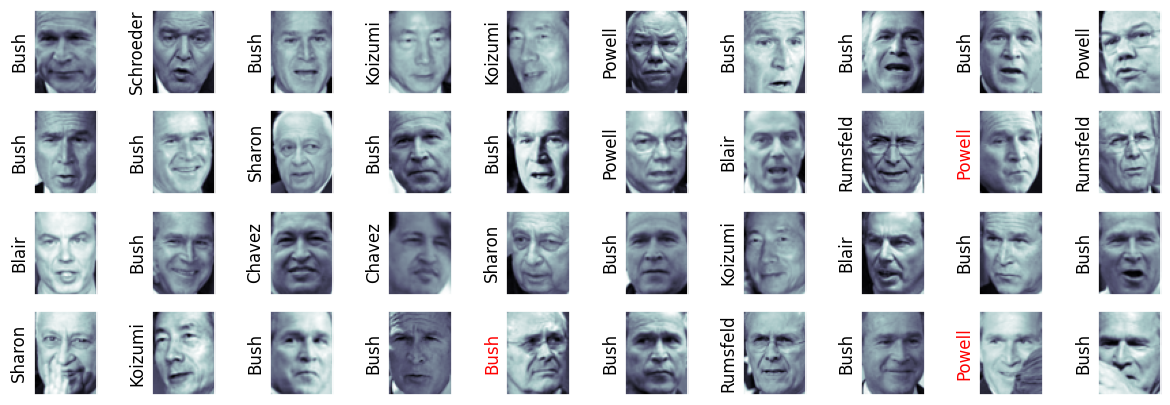

In [68]:
fig, ax = plt.subplots(4, 10, figsize=(15, 5))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')

In [69]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.81      0.87      0.84        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.77      0.74      0.75        31
    George W Bush       0.90      0.88      0.89       126
Gerhard Schroeder       0.90      0.83      0.86        23
      Hugo Chavez       0.94      0.75      0.83        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.84      0.90      0.87        42

         accuracy                           0.86       337
        macro avg       0.86      0.86      0.86       337
     weighted avg       0.87      0.86      0.86       337



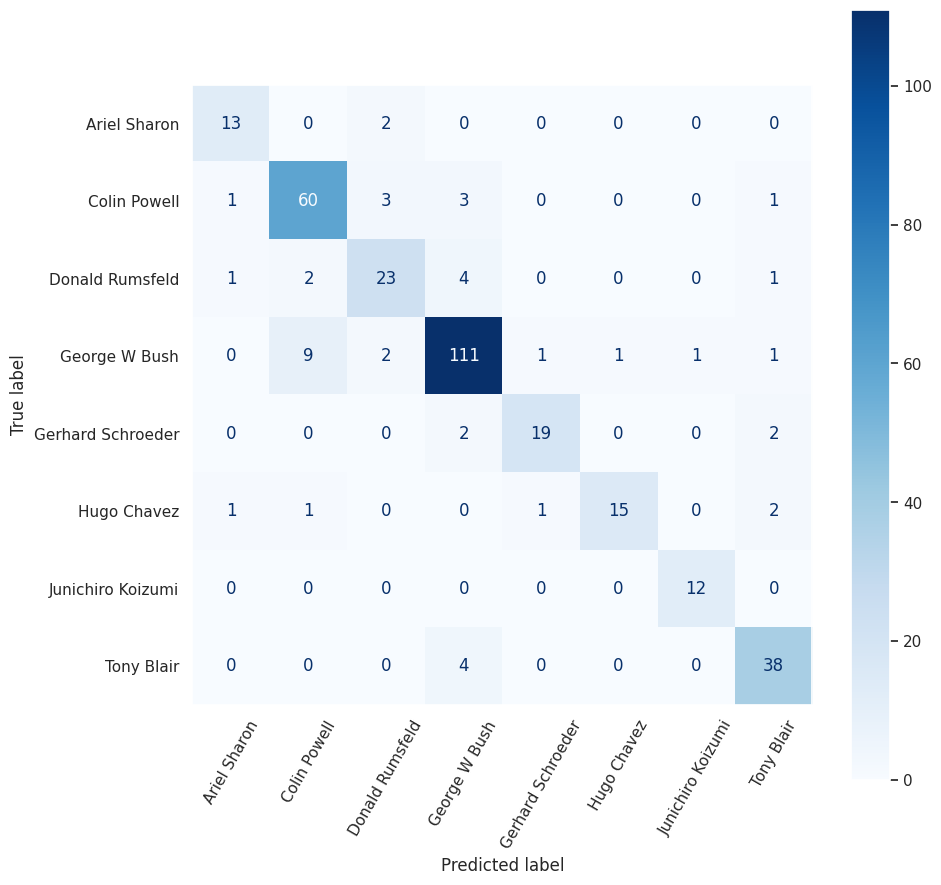

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ytest, yfit)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=faces.target_names)
fig, ax = plt.subplots(figsize=(10,10))
plt.grid(None)
disp.plot(ax=ax,cmap=plt.cm.Blues, xticks_rotation=60)